# Information:

This jupyter notebook is solution of task for data exploration classes. Instructions from lecturer and my solution below.

## Instructions:
1. Download data set, Global Terrorism Database, from https://www.kaggle.com/START-UMD/gtd
2. Take a quick look at the data set. Check what's inside, how the data is structured, and where the data is corrupted (missing values, bad structure, etc).
3. Think and create 5 questions to the data. Try to ask yourself what's really interesting in the data set. What's not so obvious. E.g. some trends, patterns, correlations.
4. Create a jupyter notebook and use python, numpy, pandas, matplotlib (at least) to provide all the answers to your questions.
5. Create a new github repository, and put your jupyter notebook there.
6. Create readme.md file as well in your github root directory with all necessary instructions (what is in the repo, what libs are necessary to run the code, where to find data set and where to save it  - this is necessary because the dataset is too big for github repo).
7. Provide the necessary documentation and introduction in your notebook using markdown language, at least: data source description, data structure, importing process, data processing process.
8. Put some data visualization in your notebook. Sometimes it's much easier to present the answer using a chart rather than numbers
9. Check if your notebook run smoothly - use 'Reset & Run All' command from the menu. Save it.
10. Export the notebook as HTML as well, and save the file in the repo.
11. Do not forget to commit/push all the changes to your repo on hithub.
12. Smile :) You did a good job!
    

### FAQ:
1. Can I take a look at different solution provided at kaggle?  Yes, you can. But check more than one solution. Try to understand what the authors are trying to solve, and how could it be used in your project. Try to find really good examples - easy to understand and not so complicated. Remember - you create the notebook as an instruction to someone else! Try to not complicate the process.
2. Can I take a look at my friend's solution, that he/she has just put on github? Yes, you can. But it's the smart way of solving the project. I'm sure that you want to be smarter in the next semester - so try to create a better solution and your own one :)
3. Jupyter notebook provide R kernel, so can I use R instead? Nope, R sucks. Even if you love R, try to solve the project using Python.\n

## Solution:

### Created questions: 
1. How the frequency of terrorist attacks has changed over the years? 
2. In which regions, countries, cities there was the most attack?
3. Most popular attacking methods?
4. What was the most favorite targets?
5. What was most popular attack types in regions?
6. How many people died in attacks? 
7. What are most active terror organizations? 
8. What are poular crime motives? 

### Table of Contents
1. [Imports](#imports)
2. [Get data ready](#data)
3. [Terrorism over the years](#over_years)
4. [Terrorist activities in regions](#regions)
5. [Most popular attacking methods](#methods)
6. [Most popular attack types in regions](#types)
7. [Most favorite targets](#targets)
8. [How many people died in attacks](#deaths) 
9. [Most active terror organizations](#activity)
10. [Popular crime motives](#motive)

### 1. Imports  <a name="imports"></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import string
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from mpl_toolkits.basemap import Basemap

[nltk_data] Downloading package stopwords to /home/xavier/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/xavier/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 2. Get data ready  <a name="data"></a>

Db import with pandas.

In [2]:
db_path = 'globalterrorismdb_0718dist.csv'
db = pd.read_csv(db_path, encoding='ISO-8859-1')

After simple filtering lets take a very first look at out DB. The results are presented in the table below

In [3]:
db.rename(columns = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                     'attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded',
                     'summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type',
                     'motive':'Motive'},inplace=True)
db_filtered = db[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed',
                  'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
db_filtered['Casualities'] = db_filtered['Killed'] + db_filtered['Wounded']
db_filtered.head(5)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


### 3. Terrorism over the years  <a name="over_years"></a>

Let's see how the frequency of terrorist attacks has changed over the years!

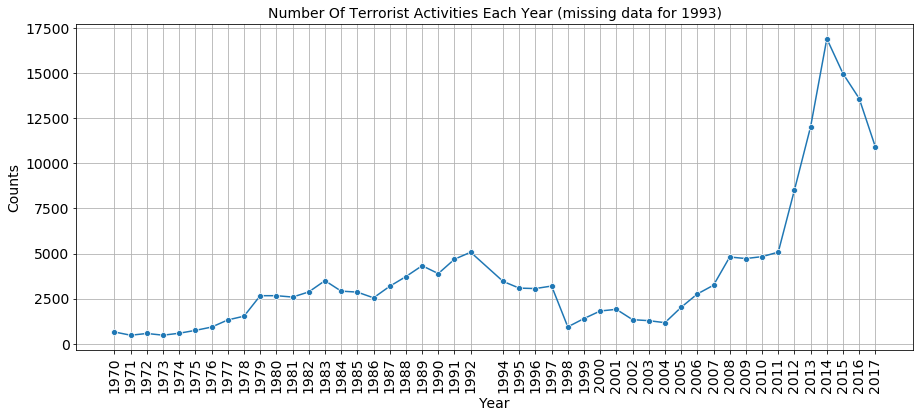

In [4]:
over_years = pd.DataFrame({'Year':db_filtered['Year'].unique(), 'Freq': db_filtered['Year'].value_counts().sort_index()})

plt.subplots(figsize=(15,6))
sns.lineplot(x='Year', y='Freq', data=over_years, marker='o', palette='inferno')
plt.xticks(over_years['Year'], rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Number Of Terrorist Activities Each Year (missing data for 1993)', fontsize=14)
plt.grid()
plt.show()

There is clearly growth of terrorist activities after 2011. 

### 4. Terrorist activities in regions  <a name="regions"></a>

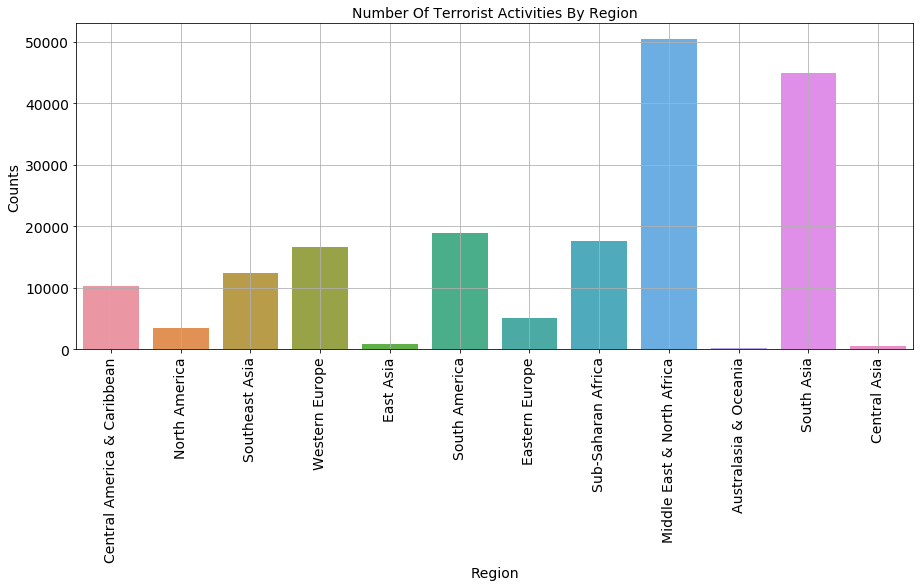

In [5]:
plt.subplots(figsize=(15,6))
sns.countplot('Region', data=db_filtered)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Number Of Terrorist Activities By Region', fontsize=14)
plt.grid()
plt.show()

Regions where are the most terrorism acts are Middle East and North Africa followed by South Asia. Australasian & Oceania region seems to be most peaceful place to live. 

Now let's take a look on top 10 dangerous countries. 

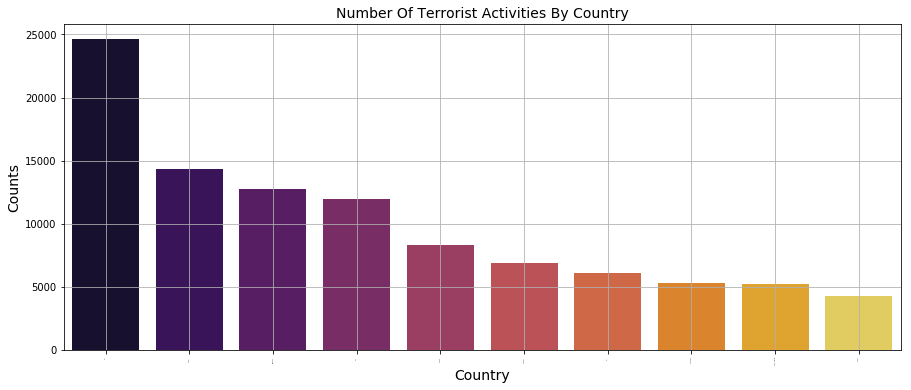

In [6]:
plt.subplots(figsize=(15,6))
sns.barplot(db_filtered['Country'].value_counts()[:10].index, 
            db_filtered['Country'].value_counts()[:10].values,
            palette='inferno')
plt.xticks(rotation=90, fontsize=1)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Number Of Terrorist Activities By Country', fontsize=14)
plt.grid()
plt.show()

As we could have foreseen most dangerous are Middle East countries. It is interesting that the US is not in the top 10 dangerous countries. 

We should check how activity in regions has been changing. 

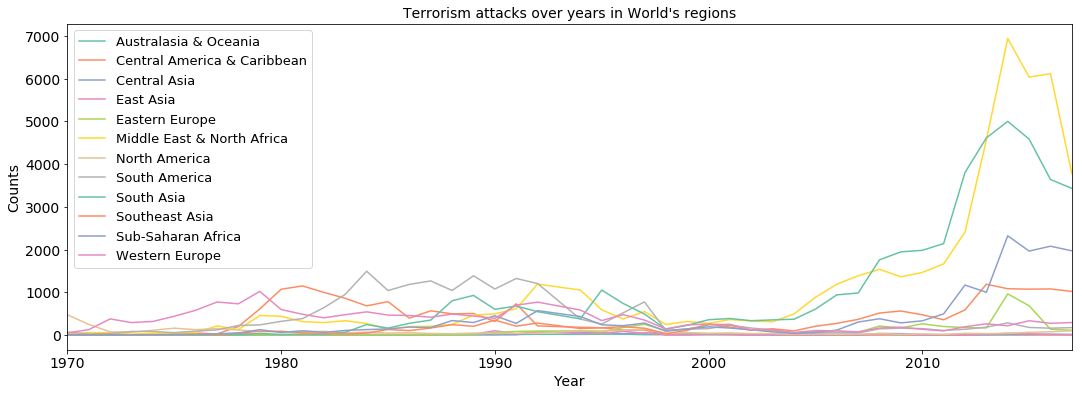

In [7]:
terror_region=pd.crosstab(db_filtered['Year'],db_filtered['Region'])
terror_region.plot(color=sns.color_palette('Set2',12),  fontsize=14)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Terrorism attacks over years in World\'s regions', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.legend(fontsize=13)
plt.show()


Let's take a global look!

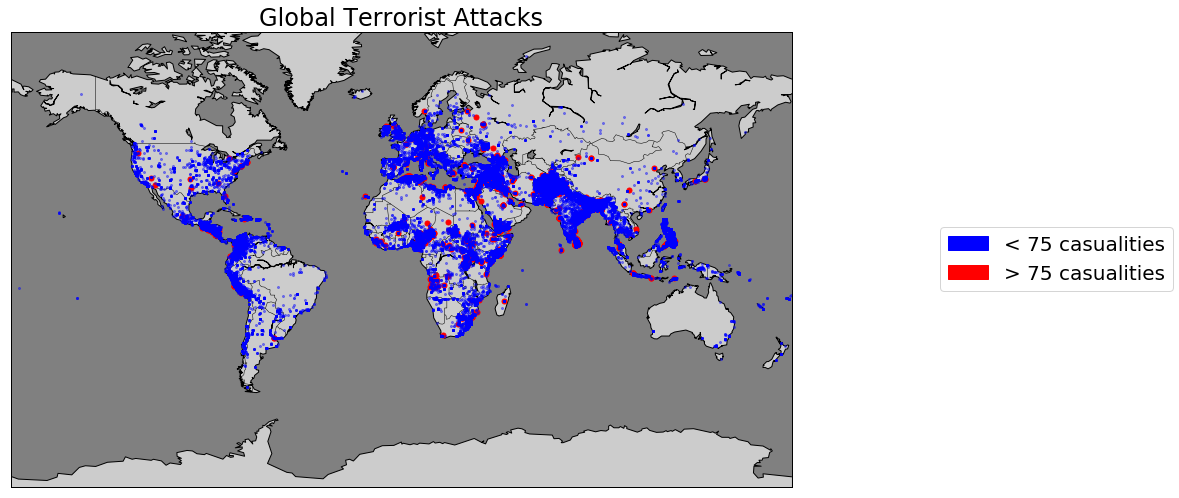

In [8]:
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
lat_100=list(db_filtered[db_filtered['Casualities']>=75].latitude)
long_100=list(db_filtered[db_filtered['Casualities']>=75].longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',markersize=5,color = 'r')
lat_=list(db_filtered[db_filtered['Casualities']<75].latitude)
long_=list(db_filtered[db_filtered['Casualities']<75].longitude)
x_,y_=m3(long_,lat_)
m3.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color='gray')
m3.drawmapboundary(fill_color='gray')
fig=plt.gcf()
fig.set_size_inches(14,12)
plt.title('Global Terrorist Attacks', fontsize=24)
plt.legend(loc='center right',
           handles=[mpatches.Patch(color='b', label = "< 75 casualities"),
                    mpatches.Patch(color='red',label='> 75 casualities')],
           bbox_to_anchor=(1, 0, 0.5, 1),
           fontsize = 20)
plt.show()



The above basemap shows the places of attacks. The red circles are those that had more than 75 casualities(wounded+killed). 

### 5. Most popular attacking methods <a name="methods"></a>

It's important to take a look on most 'popular' attack types. 

Text(0.5, 1.0, 'Most popular attack types')

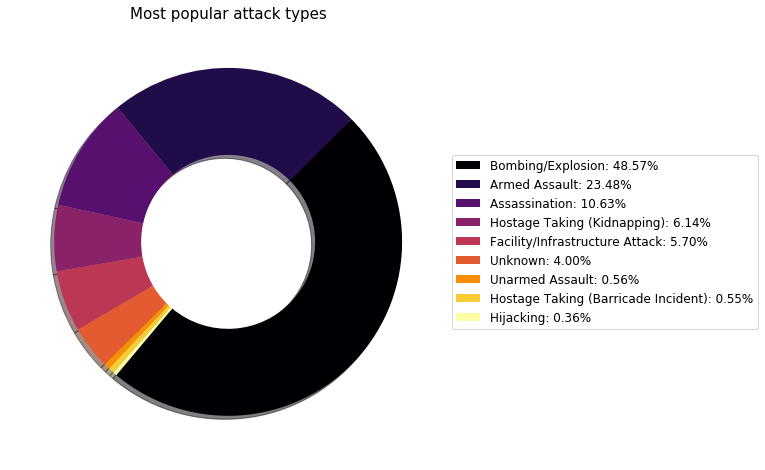

In [9]:
data = db_filtered['AttackType'].value_counts()
labels = db_filtered['AttackType'].value_counts().index
colors = plt.cm.inferno(np.linspace(0., 1., len(labels)))

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(8,8))
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-130, colors=colors, shadow=True)
ax.legend(handles=wedges, 
          labels=[f'{l}: {s/data.sum()*100:.2f}%' for l, s in zip(labels, data)], 
          loc='center left', 
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=12)

ax.set_title('Most popular attack types', fontsize=15)

The main aim of terrorist attacks it's to terrify population. Bombing is the right method for this - not very subtle and not very precise, but effective especially when it comes to terryfing people.  

### 6. Most popular attack types in regions <a name="types"></a>

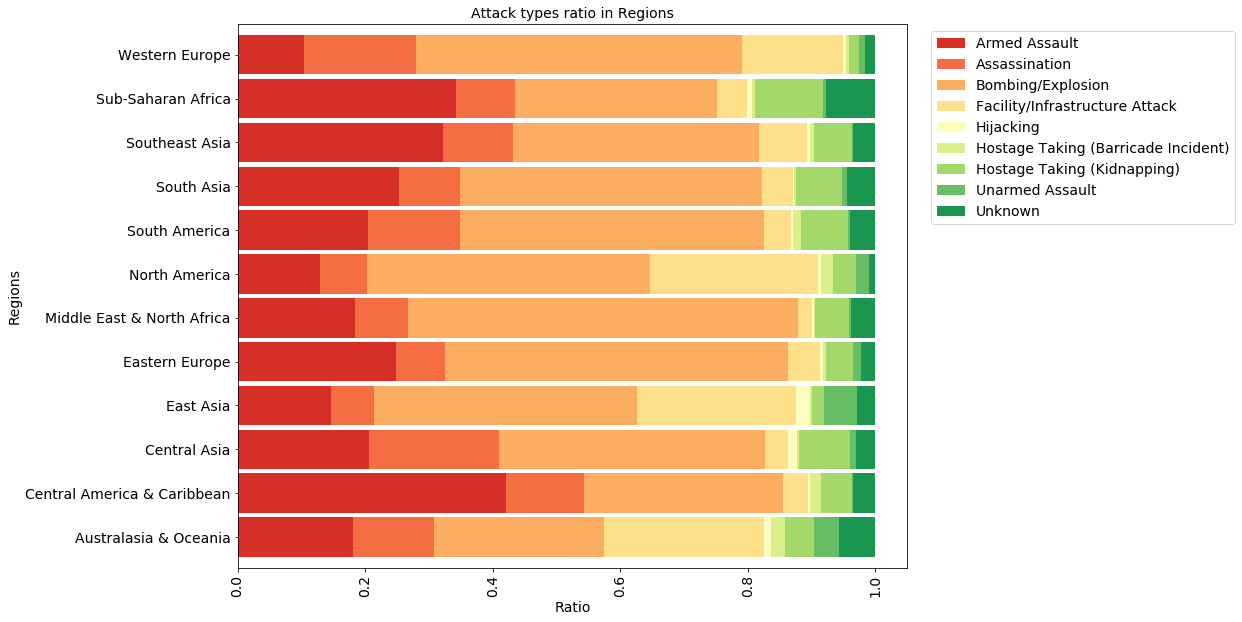

In [10]:
pd.crosstab(db_filtered['Region'],
            db_filtered['AttackType'], normalize='index')\
.plot.barh(stacked=True, width=0.9, color=sns.color_palette('RdYlGn',9), fontsize=13)

fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Regions', fontsize=14)
plt.xlabel('Ratio', fontsize=14)
plt.title('Attack types ratio in Regions', fontsize=14)
plt.legend(bbox_to_anchor=(1, 0, 0.5, 1), fontsize=14)
plt.show()

For almost every region attack types ratio looks similarly. In Central America & Caribbean region arme assault it's more popular than in others, central asians likes assasinations and in North America, Australasia and East Asia there is more hijackings.  

### 7. Most favorite targets <a name="targets"></a>

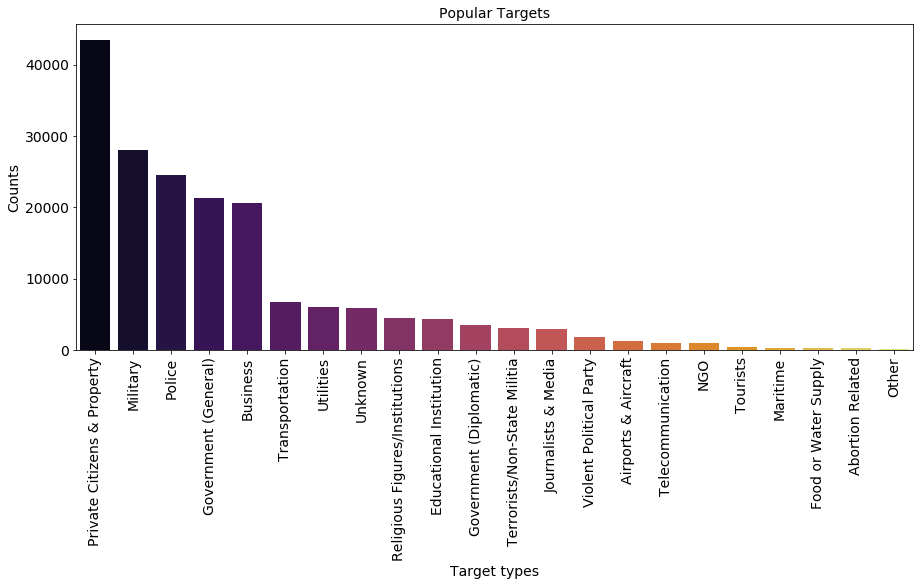

In [11]:
plt.subplots(figsize=(15,6))
sns.countplot(db_filtered['Target_type'],
              palette='inferno',
              order=db_filtered['Target_type'].value_counts().index)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Target types', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Popular Targets', fontsize=14)
plt.show()

It is foreseeable that private citizens are main target because terrorism is mainly about terrify people.  

### 8. How many people died in attacks <a name="deaths"></a>

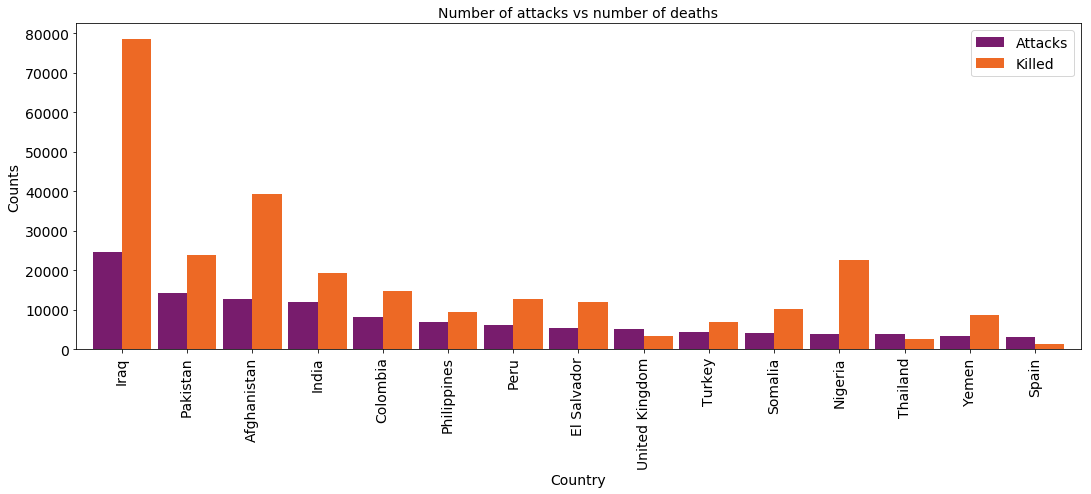

In [12]:
coun_terror=db_filtered['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=db_filtered.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,
                  left_index=True,
                  right_index=True,
                  how='left').plot.bar(width=0.9, colors=sns.color_palette('inferno',2))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Number of attacks vs number of deaths', fontsize=14)
plt.legend(fontsize=14)
plt.show()

It is terryfing how many people died in Middle East, let's take a look on Iraq, Pakistan, Afganistan... 

### 9. Most active terror organizations <a name="activity"></a>

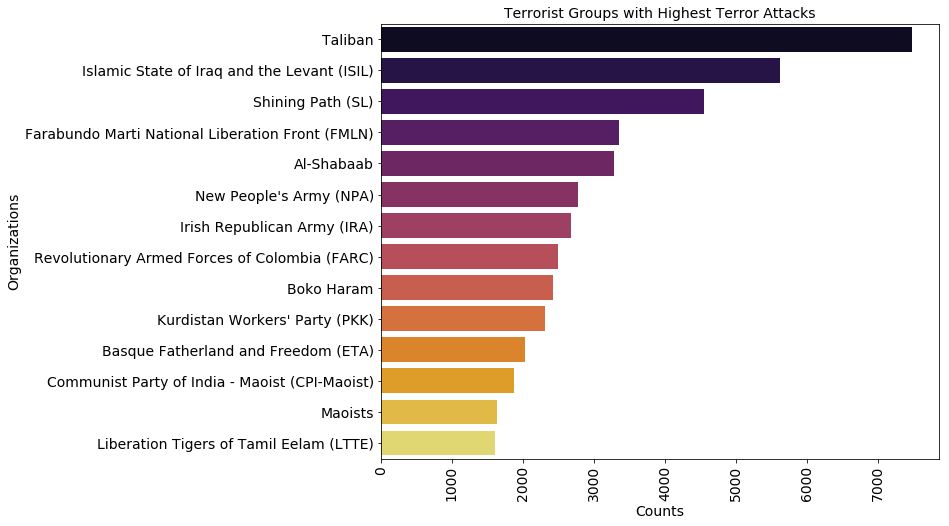

In [13]:
# most notorious organizations

sns.barplot(db_filtered['Group'].value_counts()[1:15].values,
            db_filtered['Group'].value_counts()[1:15].index,
            palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Counts', fontsize=14)
plt.ylabel('Organizations', fontsize=14)
plt.title('Number of attacks vs number of deaths', fontsize=14)
plt.title('Terrorist Groups with Highest Terror Attacks', fontsize=14)
plt.show()

We can se that most active groupes are connected with religious views - Taliban, ISIL, Al-Shabaab are islam led by Islamic radicals, but there are also some politic based organisations like SL, FMLN or IRA. 

Now let's see how groups activity have been changing.

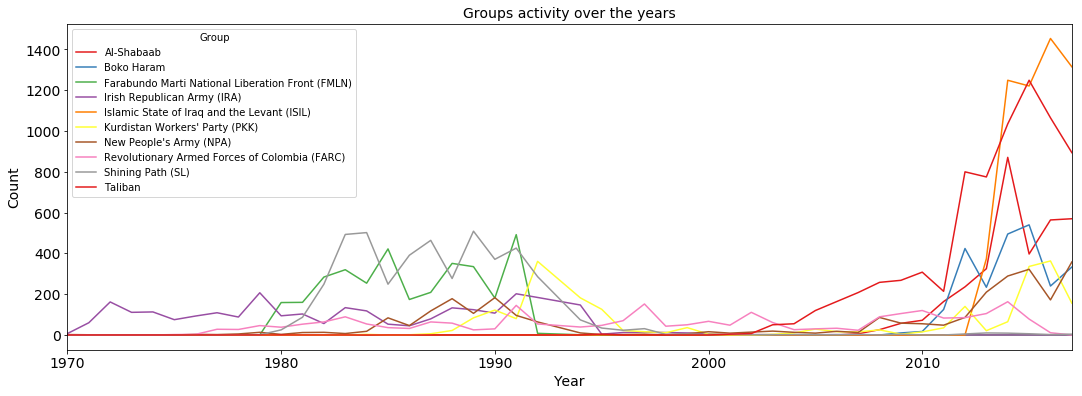

In [14]:
top_groups=db_filtered[db_filtered['Group'].isin(db_filtered['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups.Year,top_groups.Group).plot(color=sns.color_palette('Set1',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Groups activity over the years', fontsize=14)
plt.show()

### 10. Popular crime motives <a name="motive"></a>

At the end we should take a look on popular terrorism motives. 

In [15]:
__wnl = WordNetLemmatizer()

def lemmatize(text: str) -> str:
    return " ".join(
        __wnl.lemmatize(word, tag[0].lower()) if tag[0].lower() in ['a', 'n', 'v'] else __wnl.lemmatize(word)
            for word, tag in pos_tag(word_tokenize(text)))

def remove_multispaces(text: str) -> str: return re.sub(r' +', ' ', text)

def lowercase(text: str) -> str: return text.lower()

def remove_punctuation(text: str) -> str: return re.sub('[%s]' % re.escape(string.punctuation), ' ', text)

def remove_numberwords(text: str) -> str: return re.sub(r'\w*\d\w*', ' ', text)

def remove_stopwords(text: str) -> str: return " ".join(x for x in text.split() if x not in STOP)

def remove_numbers(text: str) -> str: return " ".join(x for x in text.split() if not  x.isdigit())

In [16]:
motives = db_filtered['Motive'] + db
motives = motives.dropna()
motives = motives.apply(lowercase)
motives = motives.apply(lemmatize)
motives = motives.apply(remove_punctuation)
motives = motives.apply(remove_numberwords)
motives = motives.apply(remove_numbers)

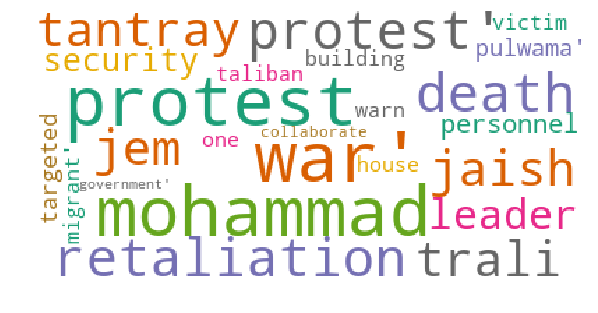

In [17]:
STOP = nltk.corpus.stopwords.words('english') + ["attack", "specific", "motive", "sources",  "unknown", 
                                                 "claim", "target", "carry", "note", "incident", "noor",
                                                 "state", "responsibility", "the", "illinois", "vietnam", 
                                                 "cairo", "december", "deparment", "draft", "state", 'source', 'police']

motives = motives.apply(remove_multispaces)
motives = motives.apply(remove_stopwords)

wordcloud = WordCloud(background_color='white', max_font_size=50, colormap='Dark2', max_words=200)
wordcloud.generate(str(motives.values))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.axis('off')
plt.show()